In [2]:
import pandas as pd
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
print(df.head(5)['review_count'])

0     7
1    15
2    22
3    80
4    13
Name: review_count, dtype: int64


In [4]:
print(df["review_count"].describe())

count    150346.000000
mean         44.866561
std         121.120136
min           5.000000
25%           8.000000
50%          15.000000
75%          37.000000
max        7568.000000
Name: review_count, dtype: float64


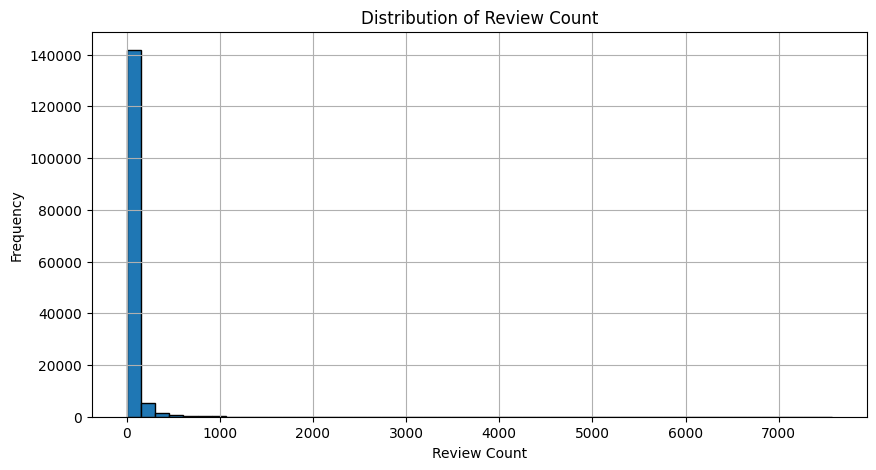

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
df['review_count'].hist(bins=50, edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Count')
plt.grid(True)
plt.savefig('./images/review_count_distribution.png')
plt.show()

In [33]:

df["review_decile"] = pd.qcut(
    df["review_count"],
    q=10,
    labels=False      # 0 … 9, keeps ordinal information
)
print("\nvalue counts per decile")
print(df["review_decile"].value_counts().sort_index())



value counts per decile
review_decile
0    26594
1     9594
2    14915
3    11008
4    15763
5    12773
6    15580
7    14344
8    14792
9    14983
Name: count, dtype: int64


In [26]:
# Show the interval ranges for each decile bucket
decile_intervals = pd.qcut(df['review_count'], q=10).unique()
for i, interval in enumerate(decile_intervals):
    print(f'Decile {i}: {interval}')

Decile 0: (6.0, 7.0]
Decile 1: (11.0, 15.0]
Decile 2: (20.0, 30.0]
Decile 3: (48.0, 97.0]
Decile 4: (4.999, 6.0]
Decile 5: (15.0, 20.0]
Decile 6: (9.0, 11.0]
Decile 7: (97.0, 7568.0]
Decile 8: (30.0, 48.0]
Decile 9: (7.0, 9.0]


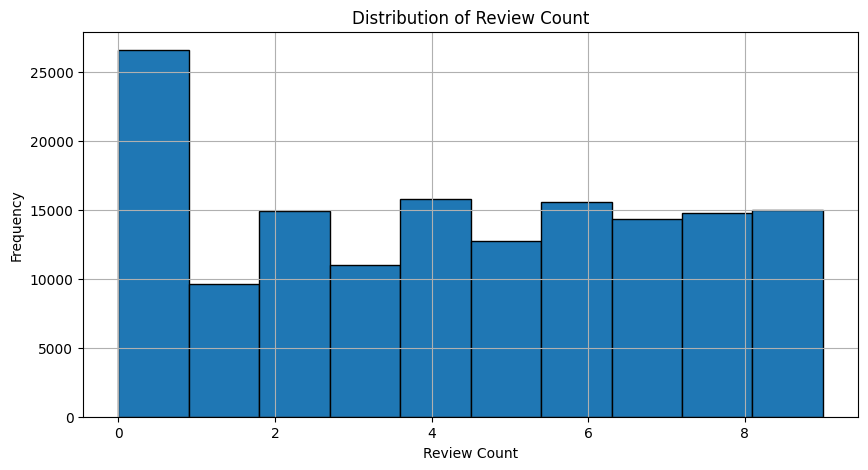

In [ ]:
plt.figure(figsize=(10, 5))
df['review_decile'].hist(bins=10, edgecolor='black')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Count')
plt.grid(True)
plt.savefig('review_count_10_distribution.png', )
plt.show()

In [3]:
zero_reviews = (df['review_count'] == 0).sum()
print(f'Number of rows with review_count = 0: {zero_reviews}')

Number of rows with review_count = 0: 0
